In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# read Iris data from pydatset
df = data('iris')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

In [3]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [5]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species


In [6]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)


In [7]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)


[Text(241.79999999999998, 332.955, 'petal_length <= 2.6\ngini = 0.667\nsamples = 84\nvalue = [28, 28, 28]\nclass = setosa'),
 Text(120.89999999999999, 237.825, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = setosa'),
 Text(362.7, 237.825, 'petal_length <= 4.75\ngini = 0.5\nsamples = 56\nvalue = [0, 28, 28]\nclass = versicolor'),
 Text(241.79999999999998, 142.695, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = versicolor'),
 Text(483.59999999999997, 142.695, 'petal_length <= 4.95\ngini = 0.175\nsamples = 31\nvalue = [0, 3, 28]\nclass = virginica'),
 Text(362.7, 47.565, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(604.5, 47.565, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]\nclass = virginica')]

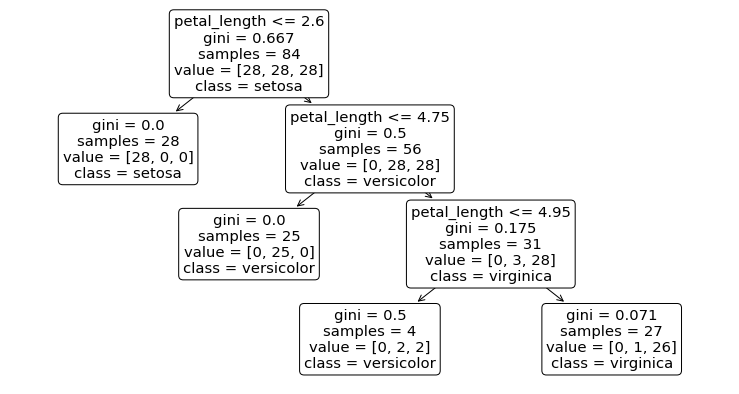

In [8]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)


In [9]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [10]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]


array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03703704, 0.96296296],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

In [11]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.96


In [12]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

In [13]:
y_train.value_counts()


versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

In [14]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,28,0,0
versicolor,0,27,1
virginica,0,2,26


In [15]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



In [16]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.94


In [17]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



# DECISION TREE

#### Exercises


Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

1. Work through these same exercises using the Telco dataset.

2. Experiment with this model on other datasets with a higher number of output classes.

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire

In [21]:
# Acquire Step
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [22]:
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [23]:
#drop nulls

In [24]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
alone            0
dtype: int64

In [25]:
#deck has 688 NaN

In [26]:
df = df.drop(columns=["deck"])

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
passenger_id,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [28]:
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
passenger_id,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [30]:
no_age_info = df[df.age.isna()]
no_age_info.alone.value_counts()

1    133
0     44
Name: alone, dtype: int64

(<AxesSubplot:>, <AxesSubplot:>)

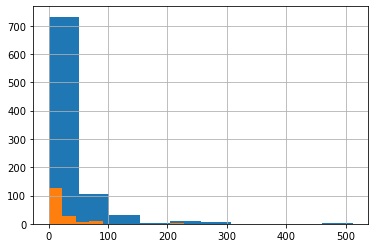

In [31]:
df.fare.hist(), no_age_info.fare.hist()

# Random Forest

### Exercises
Continue working in your model file with titanic data to do the following:

Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps increasing your min_samples_leaf and decreasing your max_depth.

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [60]:
# Acquire Step
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [82]:
177 / 891

0.19865319865319866

In [83]:
# Remove unneccessary columns
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [85]:
#drop nulls
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
alone            0
dtype: int64

In [86]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])

In [87]:
# Let's fill embark_town with the most common observation
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [88]:
# Let's investigate the observations with missing age
# My first thought was empty age values might indicate children
# Looks like most of these individuals were traveling alone
no_age_info = df[df.age.isna()]
no_age_info.alone.value_counts()

1    133
0     44
Name: alone, dtype: int64

(<AxesSubplot:>, <AxesSubplot:>)

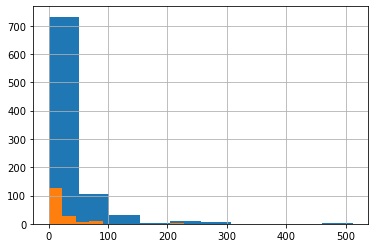

In [90]:
df.fare.hist(), no_age_info.fare.hist()

In [91]:
# Let's see how similar this group is to the population
for column in df.drop(columns=["age", "fare"]).columns:
    print(column)
    print("Population:")
    print(df[column].value_counts(normalize=True))
    print("No age")
    print(no_age_info[column].value_counts(normalize=True))
    print()
    print()

survived
Population:
0    0.616162
1    0.383838
Name: survived, dtype: float64
No age
0    0.706215
1    0.293785
Name: survived, dtype: float64


pclass
Population:
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64
No age
3    0.768362
1    0.169492
2    0.062147
Name: pclass, dtype: float64


sex
Population:
male      0.647587
female    0.352413
Name: sex, dtype: float64
No age
male      0.700565
female    0.299435
Name: sex, dtype: float64


sibsp
Population:
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64
No age
0    0.774011
1    0.146893
8    0.039548
3    0.022599
2    0.016949
Name: sibsp, dtype: float64


parch
Population:
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64
No age
0    0.887006
2    0.067797
1    0.045198
Name: parch, dtype: float64


embark_town
Population:
Southampton    0.724409
Cherbou

In [92]:
# Looking at the distribution of values, it appears that no age subgroup is very close to the population
# If we needed to be more certain, we could perform hypothesis testing
# It looks like there's nothing wildly different about the no age group compared to the population
# So we'll impute using the median age
df.age = df.age.fillna(value=df.age.median())

In [93]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [94]:
# split
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [95]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [ ]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [96]:
X_train.shape, X_validate.shape, X_test.shape

((498, 4), (214, 4), (179, 4))

In [98]:
X_train.head()

,pclass,age,alone,fare
583,1,36.000000,1,40.1250
165,3,9.000000,0,20.5250
50,3,7.000000,0,39.6875
259,2,50.000000,0,26.0000
306,1,29.678105,1,110.8833


In [99]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [100]:
# Make the model
forest1 = RandomForestClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.736527,0.628049,0.700803,0.682288,0.694922
recall,0.801303,0.539267,0.700803,0.670285,0.700803
f1-score,0.767551,0.580282,0.700803,0.673916,0.695727
support,307.000000,191.000000,0.700803,498.000000,498.000000


In [101]:
# sklearn confusion matrix
pd.DataFrame(confusion_matrix(y_predictions, y_train))

,0,1
0,246,88
1,61,103


In [102]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(103, 246, 61, 88)

In [103]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7008032128514057
True Positive Rate: 0.5392670157068062
False Positive Rate: 0.1986970684039088
True Negative Rate: 0.8013029315960912
False Negative Rate: 0.4607329842931937
Precision: 0.6280487804878049
Recall: 0.5392670157068062
F1 Score: 0.5802816901408451
Support (0): 191
Support (1): 307


In [104]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.750751    0.654545  0.718876    0.702648      0.713853
recall       0.814332    0.565445  0.718876    0.689889      0.718876
f1-score     0.781250    0.606742  0.718876    0.693996      0.714320
support    307.000000  191.000000  0.718876  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.755814    0.694805  0.736948    0.725310      0.732415
recall       0.846906    0.560209  0.736948    0.703557      0.736948
f1-score     0.798771    0.620290  0.736948    0.709530      0.730317
support    307.000000  191.000000  0.736948  498.000000    498.000000

Tree with max depth of 4
                    0           1  accuracy   macro avg  weighted avg
precision    0.767241    0.733333  0.757028    0.750287      0.754236
recall       0.869707    0.575916  0.757028    0.722812      0.757028
f1-score     

In [105]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.718876,0.719626,-0.000751
1,3,0.736948,0.714953,0.021995
2,4,0.757028,0.728972,0.028056
3,5,0.773092,0.747664,0.025429
4,6,0.797189,0.757009,0.040179
5,7,0.853414,0.752336,0.101077
6,8,0.887550,0.733645,0.153905
7,9,0.923695,0.728972,0.194723
8,10,0.941767,0.728972,0.212795
9,11,0.961847,0.738318,0.223530


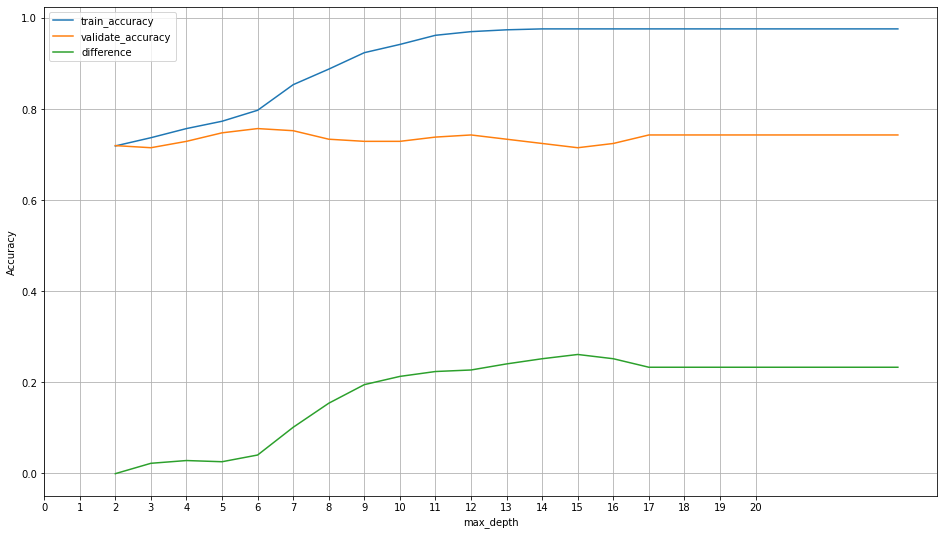

In [106]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [107]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.893574,0.733645,0.159929
1,3,17,0.849398,0.733645,0.115753
2,4,16,0.821285,0.719626,0.101659
3,5,15,0.787149,0.742991,0.044158
4,6,14,0.785141,0.742991,0.042150
5,7,13,0.773092,0.752336,0.020756
6,8,12,0.769076,0.747664,0.021413
7,9,11,0.761044,0.738318,0.022726
8,10,10,0.759036,0.757009,0.002027
9,11,9,0.755020,0.742991,0.012029


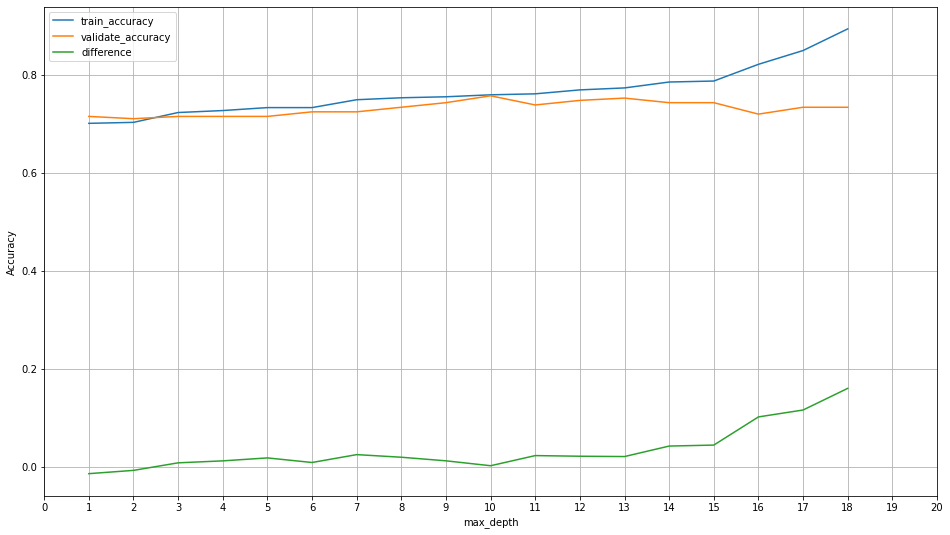

In [108]:
df.set_index('max_depth')[['train_accuracy', 'validate_accuracy','difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

<AxesSubplot:xlabel='max_depth', ylabel='difference'>

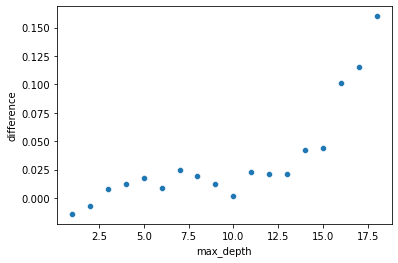

In [109]:
sns.scatterplot(x="max_depth", y="difference", data=df)

<AxesSubplot:xlabel='min_samples_per_leaf', ylabel='difference'>

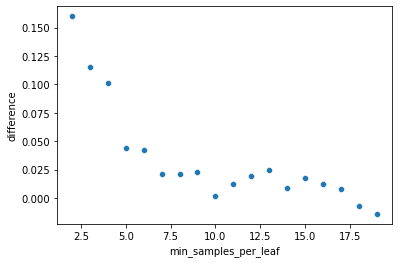

In [110]:
sns.scatterplot(x="min_samples_per_leaf", y="difference", data=df)

<AxesSubplot:xlabel='difference', ylabel='validate_accuracy'>

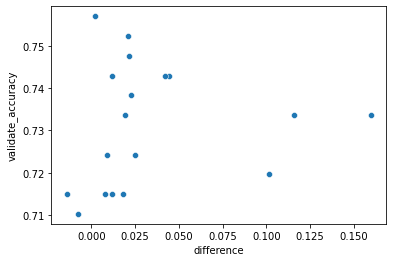

In [111]:
sns.scatterplot(x="difference", y="validate_accuracy", data=df)

In [112]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.718876,0.719626,-0.000751
1,3,3,0.740964,0.714953,0.026011
2,4,4,0.738956,0.733645,0.005311
3,5,5,0.763052,0.742991,0.020062
4,6,6,0.767068,0.738318,0.028751
5,7,7,0.769076,0.752336,0.016740
6,8,8,0.765060,0.752336,0.012724
7,9,9,0.759036,0.738318,0.020718
8,10,10,0.759036,0.757009,0.002027
9,11,11,0.755020,0.742991,0.012029


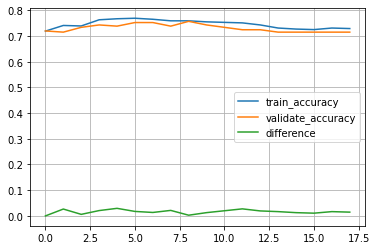

In [113]:
df[['train_accuracy', 'validate_accuracy','difference']].plot()
plt.grid()

In [114]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 5
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,5,0.771084,0.738318,0.032767
1,3,5,0.775100,0.738318,0.036783
2,4,5,0.761044,0.738318,0.022726
3,5,5,0.763052,0.742991,0.020062
4,6,5,0.757028,0.738318,0.018710
5,7,5,0.744980,0.742991,0.001989
6,8,5,0.746988,0.733645,0.013343
7,9,5,0.746988,0.738318,0.008670
8,10,5,0.748996,0.733645,0.015351
9,11,5,0.748996,0.738318,0.010678


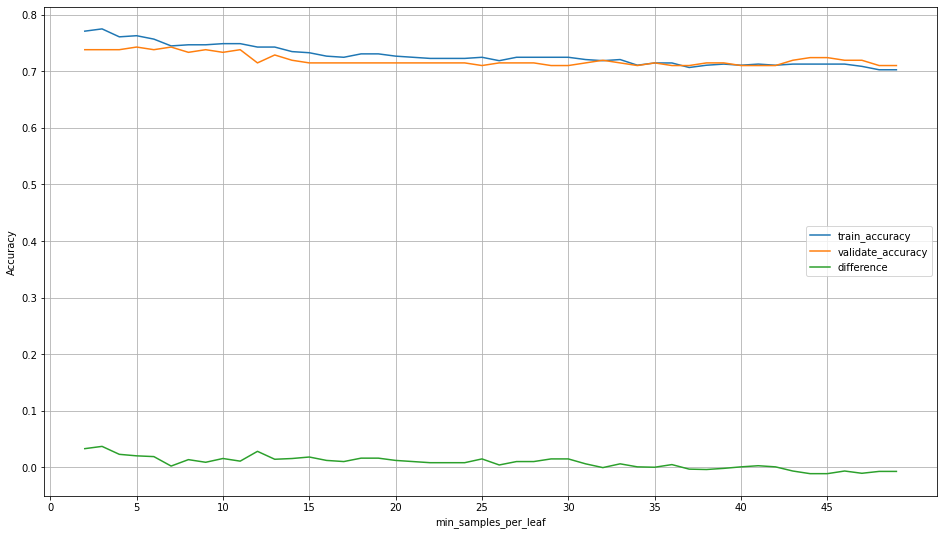

In [115]:
df.set_index('min_samples_per_leaf')[['train_accuracy', 'validate_accuracy', 'difference']].plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,50,5))
plt.grid()

# KNN

### Exercises
Continue working in your model file with the titanic dataset.

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 setting k to 10

Run through setps 2-4 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

In [61]:
train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data())

In [62]:
train.shape, validate.shape, test.shape

((498, 13), (214, 13), (179, 13))

In [63]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [64]:
x_cols = ['pclass', 'age', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [65]:
X_train.head()

,pclass,age,alone,fare
583,1,36.000000,1,40.1250
165,3,9.000000,0,20.5250
50,3,7.000000,0,39.6875
259,2,50.000000,0,26.0000
306,1,29.678105,1,110.8833


In [66]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       307
           1       0.96      0.97      0.97       191

    accuracy                           0.97       498
   macro avg       0.97      0.97      0.97       498
weighted avg       0.97      0.97      0.97       498



In [69]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.980392,0.963542,0.973896,0.971967,0.973929
recall,0.977199,0.968586,0.973896,0.972893,0.973896
f1-score,0.978793,0.966057,0.973896,0.972425,0.973908
support,307.000000,191.000000,0.973896,498.000000,498.000000


In [70]:
confusion_matrix(y_train, y_pred)

array([[300,   7],
       [  6, 185]])

In [71]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,300,7
1,6,185


In [72]:
# Lets be nicer and say that the "positive" outcome is survival = 1
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TN, FP, FN, TP 

(300, 7, 6, 185)

In [73]:

def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [74]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.9738955823293173
Precision: 0.9635416666666666
Recall: 0.9685863874345549
True Positive Rate: 0.9685863874345549
True Negative Rate: 0.9771986970684039
False Positive Rate: 0.02280130293159609
False Negative Rate: 0.031413612565445025
F1 Score: 0.9660574412532636
Support (0): 191
Support (1): 307


In [75]:
# knn classifier with n_neighbour = 10

knn2 = KNeighborsClassifier(10)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.721785,0.726496,0.722892,0.724140,0.723592
recall,0.895765,0.445026,0.722892,0.670396,0.722892
f1-score,0.799419,0.551948,0.722892,0.675683,0.704505
support,307.000000,191.000000,0.722892,498.000000,498.000000


In [76]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,275,32
1,106,85


In [77]:
# knn classifier with n_neighbour = 20

knn3 = KNeighborsClassifier(20)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 20")
pd.DataFrame(report)

n_neighbour = 20


,0,1,accuracy,macro avg,weighted avg
precision,0.712042,0.698276,0.708835,0.705159,0.706762
recall,0.885993,0.424084,0.708835,0.655039,0.708835
f1-score,0.789550,0.527687,0.708835,0.658619,0.689117
support,307.000000,191.000000,0.708835,498.000000,498.000000


In [78]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,272,35
1,110,81


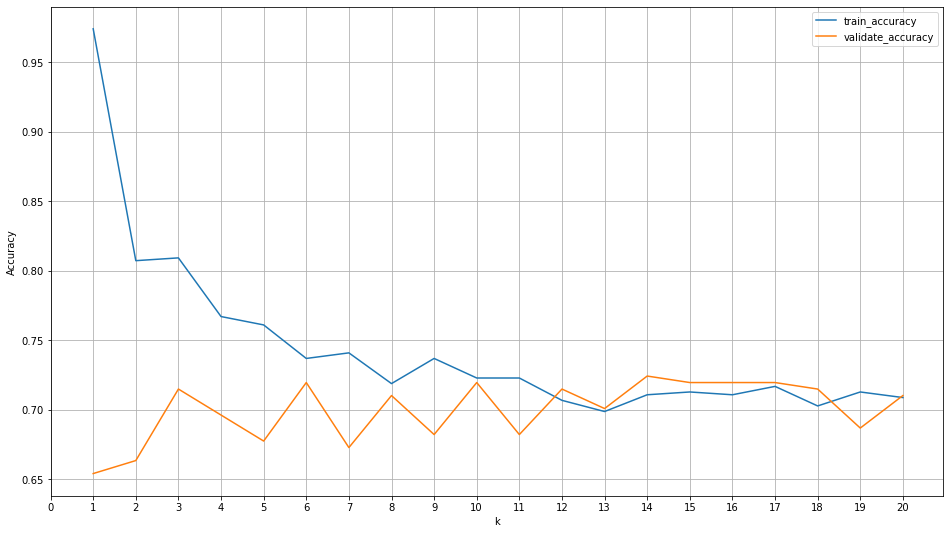

In [79]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()